In [ ]:
!pip install transformers diffusers torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import openai
import json
from openai import OpenAI
from huggingface_hub import login
from diffusers import StableDiffusionPipeline
import torch
from IPython.display import Image, display

In [ ]:
# Replace with your own OpenRouter API key
openrouter_api_key = "your_api_key"

# Initialize OpenRouter client
client = OpenAI(
    base_url="https://openrouter.ai/api/v1",
    api_key=openrouter_api_key,
)

# Log in to Hugging Face (replace with your actual token)
login("your_login_token")

In [ ]:
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.to("cuda")  # Ensure it's using GPU if available

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.32.2",
  "_name_or_path": "CompVis/stable-diffusion-v1-4",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [ ]:
def generate_image(user_query):

    try:
        # Generate the image
        image = pipe(user_query).images[0]
        image_path = "/tmp/generated_image.png"

        # Save the image to a file
        image.save(image_path)

        # Display the image in Colab or Jupyter
        display(Image(image_path))
    except Exception as e:
        print(f"Error generating image: {e}")

# Function to query OpenRouter with Mistral-7B-Instruct
def openrouter_completion(model_name, user_query):
    # Assuming you have already set up the OpenRouter client for completion
    completion = client.chat.completions.create(
        model=model_name,
        messages=[{
            "role": "user",
            "content": user_query
        }]
    )
    return completion.choices[0].message.content

  # Function to reformulate the user query
def reformulate_query(user_input, model_type):
    if model_type == "image":
        # Reformulate image-related query to focus on description keywords
        return "Generate an image of " + " ".join([word for word in user_input.split() if word.lower() not in ["can", "you", "please", "show", "me"]])
    else:
        # Reformulate text-related query to focus on the key question
        return "Please provide more information about " + " ".join([word for word in user_input.split() if word.lower() not in ["can", "you", "tell", "me", "please"]])

# Router function to decide which model to route to based on user input
def router(user_input):
    # Check for image-related keywords (can be expanded based on your needs)
    if "image" in user_input.lower() or "generate" in user_input.lower() or "create a picture" in user_input.lower():
        return "image"  # Route image generation queries to image handling
    else:
        return "mistralai/mistral-7b-instruct-v0.1"  # Route text queries to Mistral

Please enter your question (or type 'exit' to quit): What is the capital of France?
Routing to: mistralai/mistral-7b-instruct-v0.1
Reformulated Query: Please provide more information about What is the capital of France?
 The capital city of France is Paris. Located in the north-central region of the country along the Seine River, it is the most populous city in France and one of the most visited cities in the world. Paris has a rich history and is well known for its art, culture, fashion, food, and architecture. The city is home to many famous landmarks, including the Eiffel Tower, the Louvre Museum, Notre-Dame Cathedral, and the Arc de Triomphe.
Please enter your question (or type 'exit' to quit): Generate an image of a red rose.
Routing to: image
Reformulated Query: Generate an image of Generate an image of a red rose.
Generating an image...


  0%|          | 0/50 [00:00<?, ?it/s]

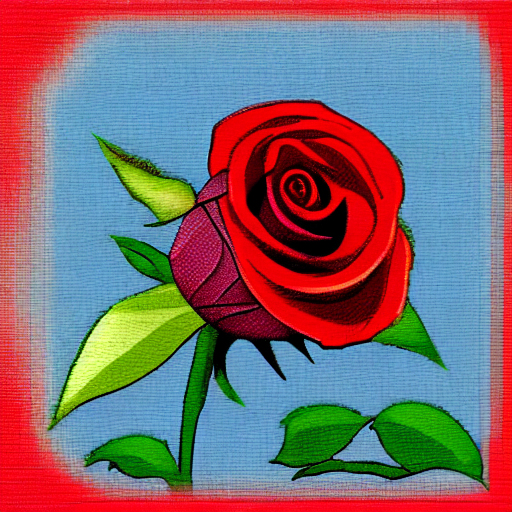

Please enter your question (or type 'exit' to quit): Generate a video of a man eating breakfast.
Routing to: image
Reformulated Query: Generate an image of Generate a video of a man eating breakfast.
Generating an image...


  0%|          | 0/50 [00:00<?, ?it/s]

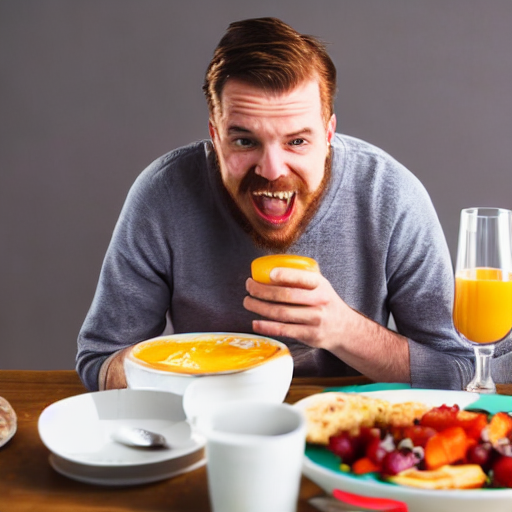

In [ ]:
# Main interaction loop
while True:
    user_input = input("Please enter your question (or type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break

    # Route the user query to the appropriate model
    model = router(user_input)
    print(f"Routing to: {model}")

    # Reformulate the query for more efficient processing
    reformulated_query = reformulate_query(user_input, model)

    # Print the reformulated query
    print(f"Reformulated Query: {reformulated_query}")

    # Pass the reformulated query to the appropriate model
    if model == "mistralai/mistral-7b-instruct-v0.1":
        print(openrouter_completion(model, reformulated_query))  # Query the Mistral model with reformulated query
    elif model == "image":
        print("Generating an image...")  # Call the image generation model with reformulated query
        generate_image(reformulated_query)  # Generate and display the image
    else:
        print("Unknown route or model.")